<div>
    <h1><center style="background-color:#C39BD3; color:white;"> 🚀 Spaceship Titanic 🚀</center></h1>
</div>

<div>
<center><img src="https://i.pinimg.com/originals/f0/f3/c2/f0f3c2e06ceaf6bfaf439f27a0a4de83.gif" width = '500px'
 height = '400px'></center>
</div>

# Importing Libraries

<div>
    <h2><center style="background-color: #7b7d7d; color:white;">
    <strong>Importing Libraries 📚</strong></center></h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from collections import Counter
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
custom_color = ["#17202a",'#e03232', '#b60337', '#fa3f75', '#fa0c40', '#f4d03f']
customPalette = sns.set_palette(sns.color_palette(custom_color))

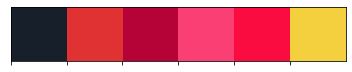

In [4]:
sns.palplot(sns.color_palette(custom_color), size=1)

In [5]:
YELLOW = sns.dark_palette(custom_color[4], reverse=False)
PINK = sns.dark_palette(custom_color[3])
# plt.show()
# sns.color_palette(sns.dark_palette(custom_color[1], reverse=False))

In [6]:
sns.color_palette(PINK)

[(0.18477345381581842, 0.13516407039450562, 0.14324077516375114),
 (0.3438971944252037, 0.15754302102148685, 0.20635732601335383),
 (0.5030209350345891, 0.17992197164846807, 0.26947387686295654),
 (0.6621446756439744, 0.20230092227544932, 0.33259042771255926),
 (0.8212684162533598, 0.22467987290243055, 0.39570697856216197),
 (0.9803921568627451, 0.24705882352941178, 0.4588235294117647)]

<div>
    <h3><center style="background-color:#7b7d7d; color:white;"> <strong>Loading Dataset and Displaying rows</strong></center></h3>
</div>

In [7]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')

In [8]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<p> So now we have imported the dataset, now let's check the datatype of each column

May be there is any mixture of different datatypes in single columns 

So lets check that first </p>

# Exploratory Data Analysis

In [ ]:
train_df.shape

## Checking dtypes

In [ ]:
print(f"{y_} Data types of data columns: \n{b_}{train_df.dtypes}")

print(f'{r_}\nOccurance of Dtypes')
[print(f"{g_}{values} Features/columns have dtype {keys}") for keys, values in Counter(train_df.dtypes).items()]

In [ ]:
train_df.head(2)

But VIP should be Bool. so let's check that, whether any other values except True and False are present in VIP or not

In [ ]:
train_df.VIP.value_counts()

So the dataset is clear from any mixing dtype, we can change dtype of VIP to bool

In [ ]:
train_df['VIP'] = train_df[['VIP']].astype(bool)

## Check for Null values

<div>
    <h4><center style="background-color:#e03232; color:black">
     So we have many null values</center>
    </h4>
</div>

In [ ]:
Na_df = pd.DataFrame(train_df.isnull().sum().sort_values(), columns= ['counts'] )
Na_df['percentage'] = (Na_df['counts']/8693)*100
Na_df

In [ ]:
fig = px.imshow(train_df.isnull(), height = 480)
# fig.update_layout(title_text = 'Null values', title_x = 0.5)
fig.show()


<p>
From Null value table and heat map, we conclude that there are null values and highest percentage of its occurance is 2.5%, so we can drop null values but as we can see from heatmap the null values are in different rows that is if we drop all null values data will reduced far greater that 2.5% or may be upto 10%</p>


So lets try dropping method first



### Dropping Null values

In [ ]:
train_df_not_null = train_df.dropna(axis = 0).reset_index(drop = True)
print(f"{m_}Shape of DataFrame after removing Null values is {train_df_not_null.shape}")
print(f"{g_}Hence the Data is reduced by {(train_df.shape[0]-train_df_not_null.shape[0])*100/8693}")

🙄🙄😲 What !! The dataset is reduced by 22% 

So we have to replace Null values

### Replace Null values

In [ ]:
# First lets take a look on rows having null values
df_null = train_df[train_df.isnull().any(axis = 1)]
df_null.head(10)

In [ ]:
train_df_1 = train_df.copy()

#### Filling Na values in CryoSleep

I think, the costs/Rates of Services plays very important role in CryoSleep. So let's Find out.

##### contains only True value for CryoSleep

In [ ]:
cryo_true = train_df_not_null[train_df_not_null.CryoSleep == True]
cryo_true.head(5)

In [ ]:
print(f"{b_}The Observations having CryoSleep True is {cryo_true.shape[0]}")

In [ ]:
[print(f"\n{bl_}{name} column have {y_}min value {value.min()} {bl_}and max value {y_}{value.max()}") 
    for name, value in cryo_true.iteritems() if (value.dtype !=object)]

In [ ]:
sns.countplot(x = cryo_true.VIP)

In [ ]:
px.histogram(data_frame=cryo_true, x = 'Destination', color = 'HomePlanet')

Conclusion:
If a person is in CryoSleep the all costs/Rate of Services are going to be zero

##### CryoSleep equal to False

In [ ]:
cryo_false = train_df_not_null[train_df_not_null.CryoSleep == False]
cryo_false.head(8)

In [ ]:
px.box(data_frame= cryo_false, x= 'RoomService')

In [ ]:
cryo_false_rates_zero = cryo_false.loc[(cryo_false.RoomService == 0) & (cryo_false.FoodCourt == 0) & 
    (cryo_false.ShoppingMall==0) & (cryo_false.Spa==0) & (cryo_false.VRDeck == 0)]

In [ ]:
cryo_false_rates_zero.head(10)

In [ ]:
cryo_false_rates_zero.shape

In [ ]:
plt.subplot(1,2,1)
sns.countplot(data=cryo_false_rates_zero, x = 'HomePlanet')
plt.subplot(1,2,2)
sns.countplot(data = cryo_false_rates_zero, x = 'Destination')

In [ ]:
px.histogram(data_frame=cryo_false_rates_zero, x = 'Destination', color = 'HomePlanet')

In [ ]:
def Plots(df, x, y=None, title = None):
    fig = make_subplots(rows= 3, cols= 1,
 
    row_heights= [0.25,0.25,0.5])
    fig.append_trace(go.Box(x=df[x],  ), row=1, col = 1)
    fig.append_trace(go.Violin(x = df[x]), row=2, col=1)
    fig.append_trace(go.Histogram(x = df[x]), row = 3, col= 1)
    

    fig.update_xaxes(title_text= 'Box plot', row = 1, col = 1)
    fig.update_xaxes(title_text= 'Voilin plot', row = 2, col=1)
    fig.update_xaxes(title_text = 'Histogram', row=3, col=1)
    fig.update_layout(title_text = title , height = 1200, width = 1000, showlegend = False)
    fig.show()

#### Filling Null values of all cost columns

As we can fill RoomService null values by taking help from CryoSleep column and Other rate/services Columns
like:
1. if CryoSleep is False, then the null value is filled by median
2. if all other services columns are equal to zero and CryoSleep is True, then Null value is also Zero (I am replace all values with zero where CryoSleep is True.)

In [ ]:
train_df_1.isnull().sum()

In [ ]:
null_before = train_df_1[train_df_1.CryoSleep == True].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == True].isnull().sum(), null_before

In [ ]:
null_before_false = train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum(), train_df_1[train_df_1.CryoSleep == False].isnull().sum()

In [ ]:
train_df_1.loc[train_df_1.CryoSleep == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0 

In [ ]:
null_after = train_df_1[train_df_1.CryoSleep == True].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == True].isnull().sum(), null_after

In [ ]:
print(f"The Null values are reduced by {(null_before - null_after)*100/(null_before)}")

In [ ]:

fig = go.Figure()
fig.add_trace(go.Box(y= cryo_false.RoomService 
    ,name='Room Service', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.FoodCourt, 
    name= 'Food Court', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.ShoppingMall, 
    name= 'Shopping mall', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.Spa, 
    name= 'Spa', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.VRDeck, 
    name= 'VRDeck', boxmean = True))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(y= cryo_false.RoomService 
    ,name='Room Service'))

fig.add_trace(go.Violin(y = cryo_false.FoodCourt, 
    name= 'Food Court'))

fig.add_trace(go.Violin(y = cryo_false.ShoppingMall, 
    name= 'Shopping mall'))

fig.add_trace(go.Violin(y = cryo_false.Spa, 
    name= 'Spa'))

fig.add_trace(go.Violin(y = cryo_false.VRDeck, 
    name= 'VRDeck'))

In [ ]:
cryo_false.median(numeric_only=True)

So we are going to replace Null Values using Median

In [ ]:
train_df_1 = train_df_1.fillna(cryo_false.median(numeric_only= True))

In [ ]:
train_df_1.isnull().sum()

In [ ]:
null_after_false = train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum()

print(f"The reduction in null values when CryoSleep is False is {(null_before_false-null_after_false)*100/null_before_false}")

In [ ]:
print(f"{y_}Total Reduction in null values is: ")
total_null = train_df.isnull().sum().sum()
total_null_after = train_df_1.isnull().sum().sum()
print(f"{b_}{(total_null - total_null_after)*100/total_null}")

#### Trying to fill remaining columns

1. I am not going to fill names columns, Because we already have id column.
2. It is impossible to fill Cabin Column null value to just drop it.
3. You can use KNN imputation to fill remaining null values, but i am going to drop null values now. 

In [ ]:
train_df_1.isnull().sum()

In [ ]:
a = round(((train_df_1.shape[0]-train_df_1.dropna(axis = 0).shape[0])*100/train_df_1.shape[0]), 4)
print(f"{bl_} After Dropping Null values the dataset is reduced by {b_}{a}")

In [ ]:
train_df_1.dropna(axis = 0, inplace= True)

#### Distribution of values

In [ ]:
def Plots(df, x, y=None, title = None):
    fig = make_subplots(rows= 3, cols= 1,
 
    row_heights= [0.25,0.25,0.5])
    fig.append_trace(go.Box(x=df[x],  ), row=1, col = 1)
    fig.append_trace(go.Violin(x = df[x]), row=2, col=1)
    fig.append_trace(go.Histogram(x = df[x]), row = 3, col= 1)
    

    fig.update_xaxes(title_text= 'Box plot', row = 1, col = 1)
    fig.update_xaxes(title_text= 'Voilin plot', row = 2, col=1)
    fig.update_xaxes(title_text = 'Histogram', row=3, col=1)
    fig.update_layout(title_text = title , height = 1200, width = 1000, showlegend = False)
    fig.show()

In [ ]:
Plots(train_df, x='RoomService', title = 'Room Service rates')